<a href="https://colab.research.google.com/drive/1_d491gsBztuy8Y8B9L9sZSwjVb_QP-sO" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Horacio Facundo Vega**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

**Dataset a utilizar:** 
* [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

**Problema que se pretende resolver:**
* Poder predecir a partir de las características y hábitos de una persona, si es o no obesa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_url = 'https://raw.githubusercontent.com/facundoVega/TP3_AA1_clasificaci-n/refs/heads/master/data/ObesityDataSet.csv'
df = pd.read_csv(dataset_url)

df.head()
print("Filas y columnas:", df.shape)


Filas y columnas: (2111, 17)


Este dataset incluye información para la estimación de niveles de obesidad en inviduos de paises de México, Peru y Colombia, basada en sus habitos alimenticios y condiciones físicas.


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Visualizacion de features Numéricas**
---

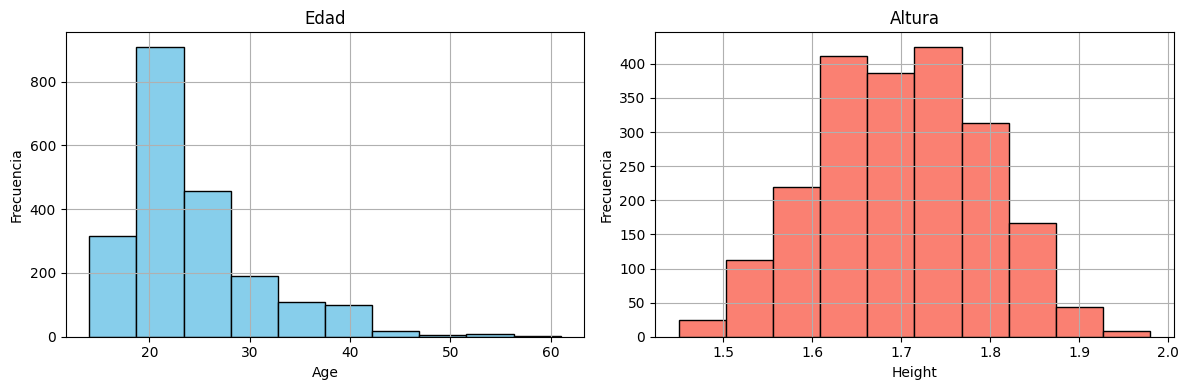

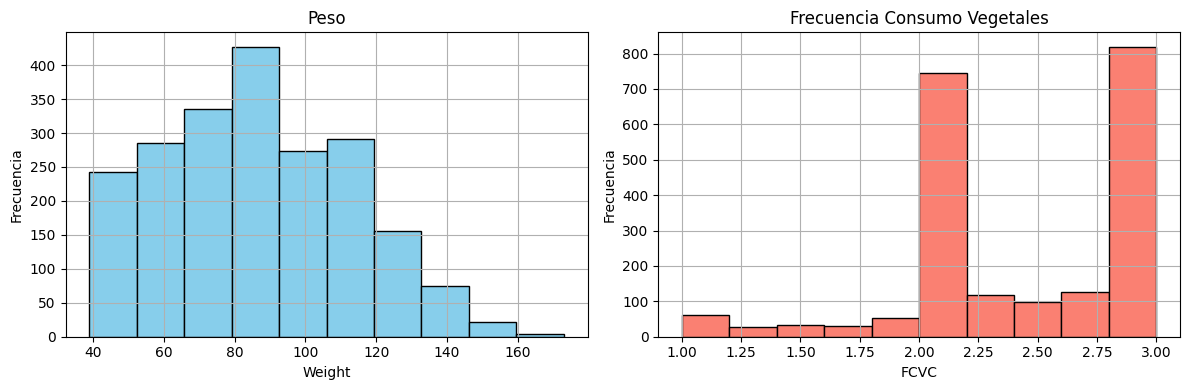

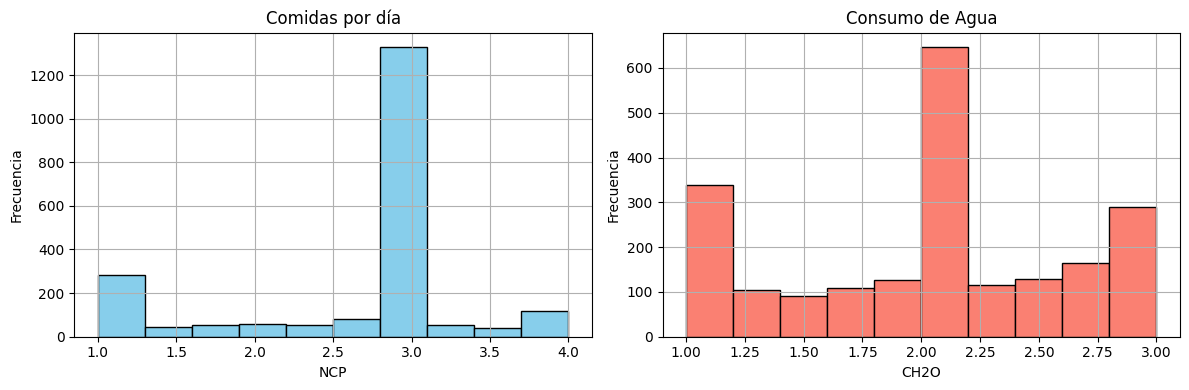

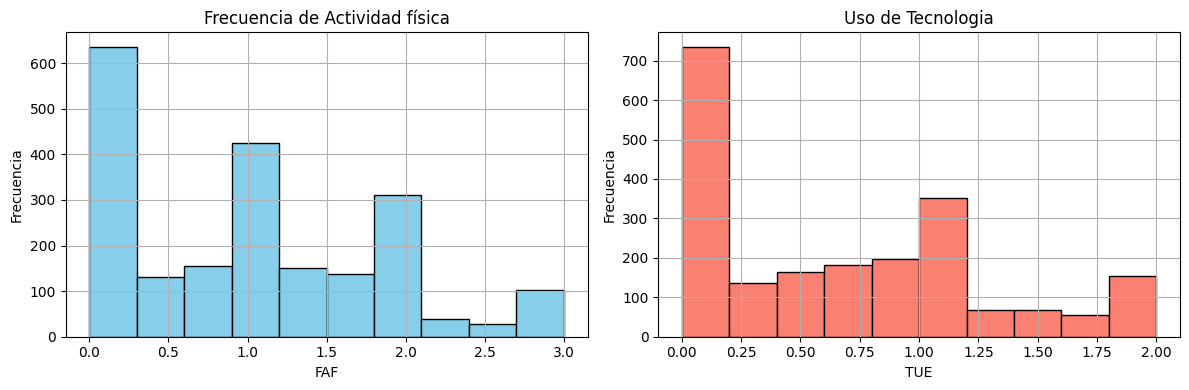

In [5]:

numeric_cols = df.select_dtypes(include='number').columns

plot_titulos = [
    'Edad', 
    'Altura',
    'Peso', 
    'Frecuencia Consumo Vegetales',
    'Comidas por día',
    'Consumo de Agua',
    'Frecuencia de Actividad física',
    'Uso de Tecnologia'
]



i = 0
while i < (len(numeric_cols) - 1):
    col1 = numeric_cols[i]
    col2 = numeric_cols[i + 1]
    
   
    # Crear figura con dos histogramas
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma de la primera columna
    df[col1].hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{plot_titulos[i]}')
    axes[0].set_xlabel(col1)
    axes[0].set_ylabel('Frecuencia')

    # Histograma de la segunda columna
    df[col2].hist(ax=axes[1], bins=10, color='salmon', edgecolor='black')
    axes[1].set_title(f'{plot_titulos[i + 1]}')
    axes[1].set_xlabel(col2)
    axes[1].set_ylabel('Frecuencia')

    plt.tight_layout() 
    plt.show()
    i  =  i + 2

**Observaciones**:

* **Feature Edad:**
    * El dataset esta centrado mayoritariamente en una población joven.( Alrededor de los 20 años ) esto puede ocasionar   que los patrones que encuentre nuestro modelo , esten dominados por este grupo etario y no representen otras edades.
    * Esto conlleva un riesgo de sobreajuste, ya que el modelo podría aprender patrones relacionados con ese rango etario y generalizar mal en otras edades.

**Visualización Variables Categóricas**
---

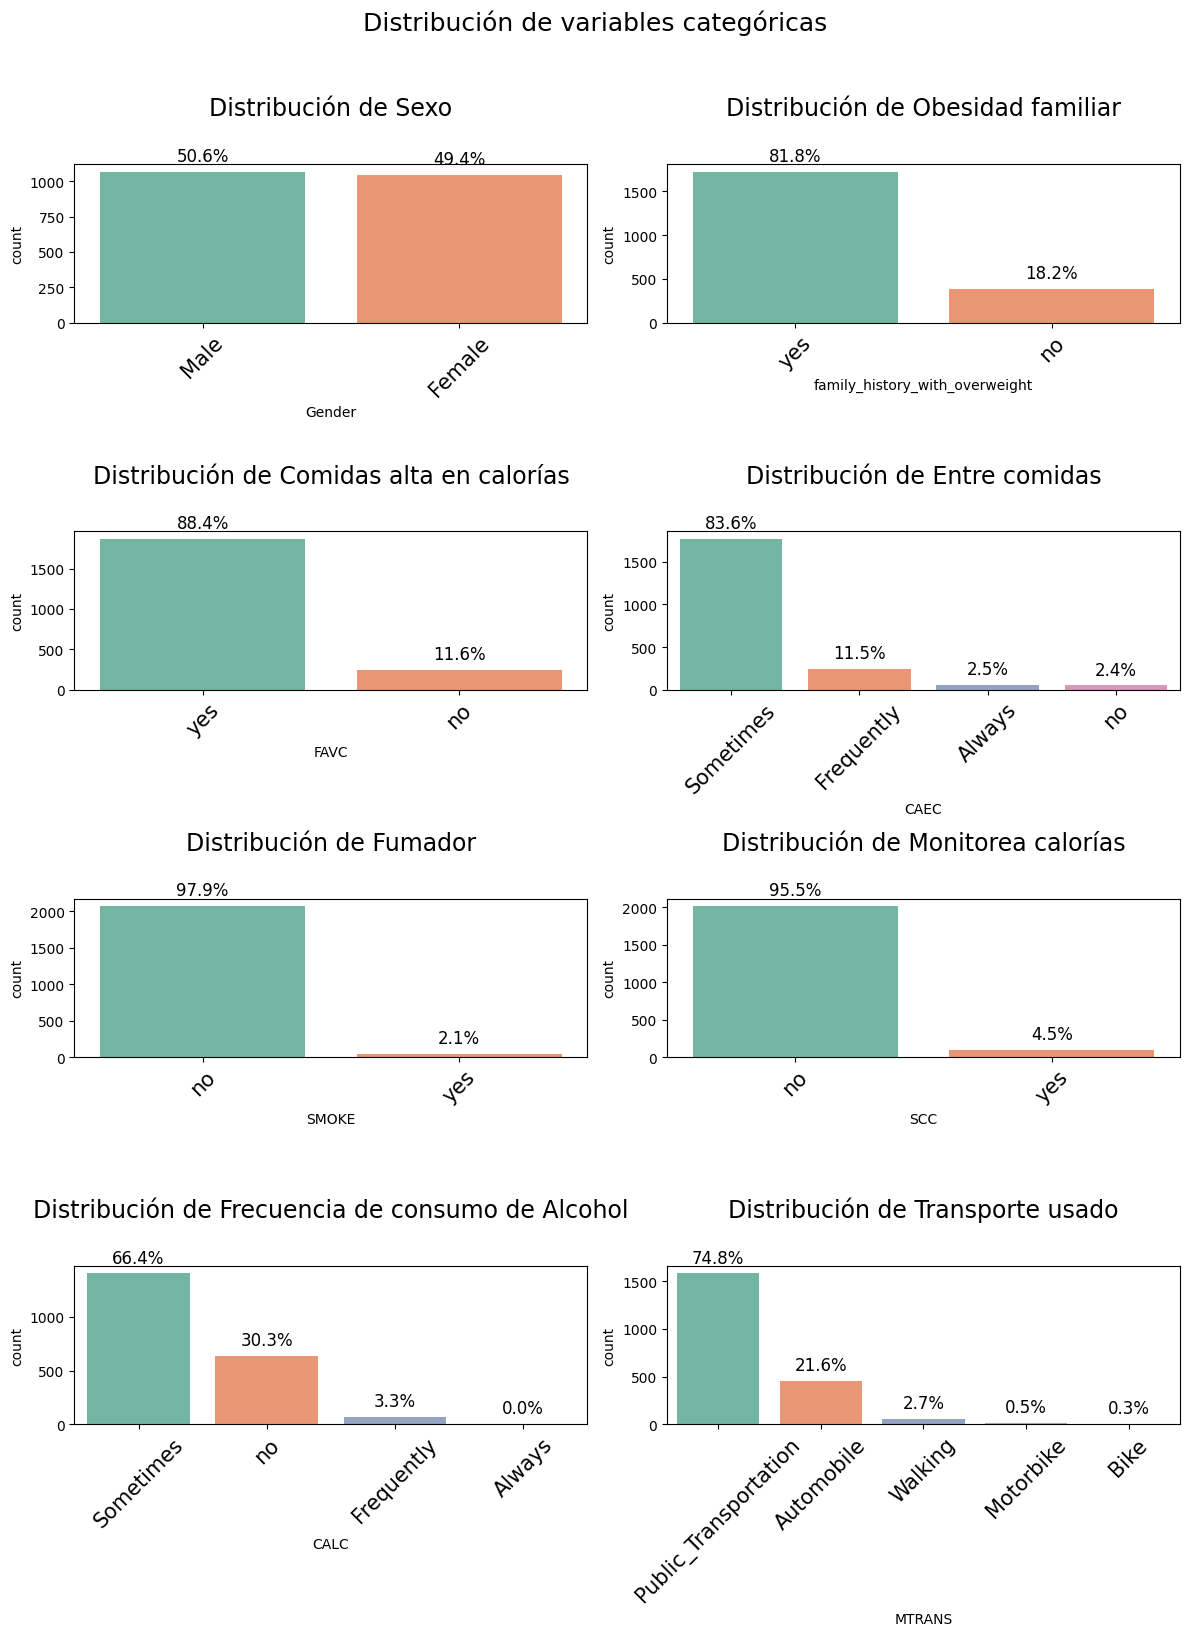

In [6]:



categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir la columna 'obesidad'
categorical_cols = [col for col in categorical_cols if col != 'NObeyesdad']

categorias = [
    'Sexo', 
    'Obesidad familiar',
    'Comidas alta en calorías', 
    'Entre comidas',
    'Fumador',
    'Monitorea calorías',
    'Frecuencia de consumo de Alcohol',
    'Transporte usado'
]

n = len(categorical_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows))

# Aplanar el array de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index,
        ax=axes[i],
        palette="Set2"
    )

    axes[i].set_title(f"Distribución de {categorias[i]}", fontsize=17,  pad=35)
    axes[i].tick_params(axis='x', rotation=45, labelsize=15)

    total = len(df[col])
    for p in axes[i].patches:
        height = p.get_height()
        porcentaje = 100 * height / total
        axes[i].annotate(
            f'{porcentaje:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
            textcoords='offset points'
        )

# # Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de variables categóricas", fontsize=18, y=1.02)
plt.tight_layout()

**Observaciones**
Las features de "Fuma"(smoke) y "Monitorea consumo calorías(SCC)" tienen bajo porcentaje de representatividad en su clase minoritaria, por lo que seguramente no me seran uútiles en mi modelo.

**Creo el target "Obesity"**

In [7]:
print(df.NObeyesdad.unique())
valores_obesidad = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
df['obesity'] = np.where(df['NObeyesdad'].isin(valores_obesidad), 1, 0)
df = df.drop('NObeyesdad', axis=1)

df.head()

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


**Verifico el balance de mi variable objetivo "Obesity"**

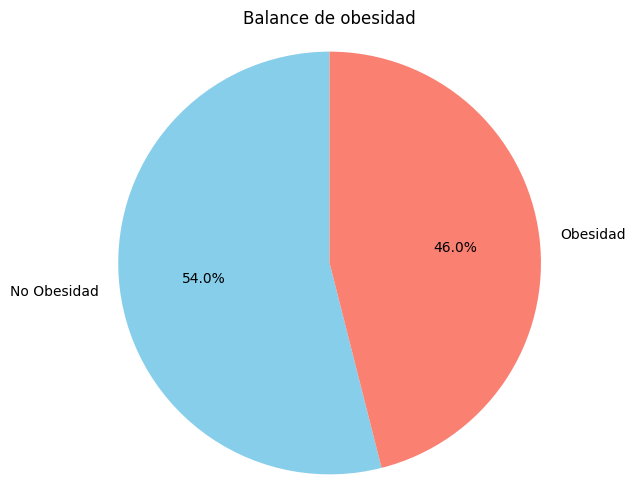

In [8]:
# Calcular proporciones
porcentajes = df['obesity'].value_counts(normalize=True) * 100
labels = porcentajes.index.map({0: 'No Obesidad', 1: 'Obesidad'})

# Graficar
plt.figure(figsize=(6, 6))
plt.pie(porcentajes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Balance de obesidad')
plt.axis('equal')  # Para que sea circular
plt.show()

**Observaciones:** <br>
* La variable target esta bastante bien balanceada.

Relacion de variables númericas y variable objetivo
---

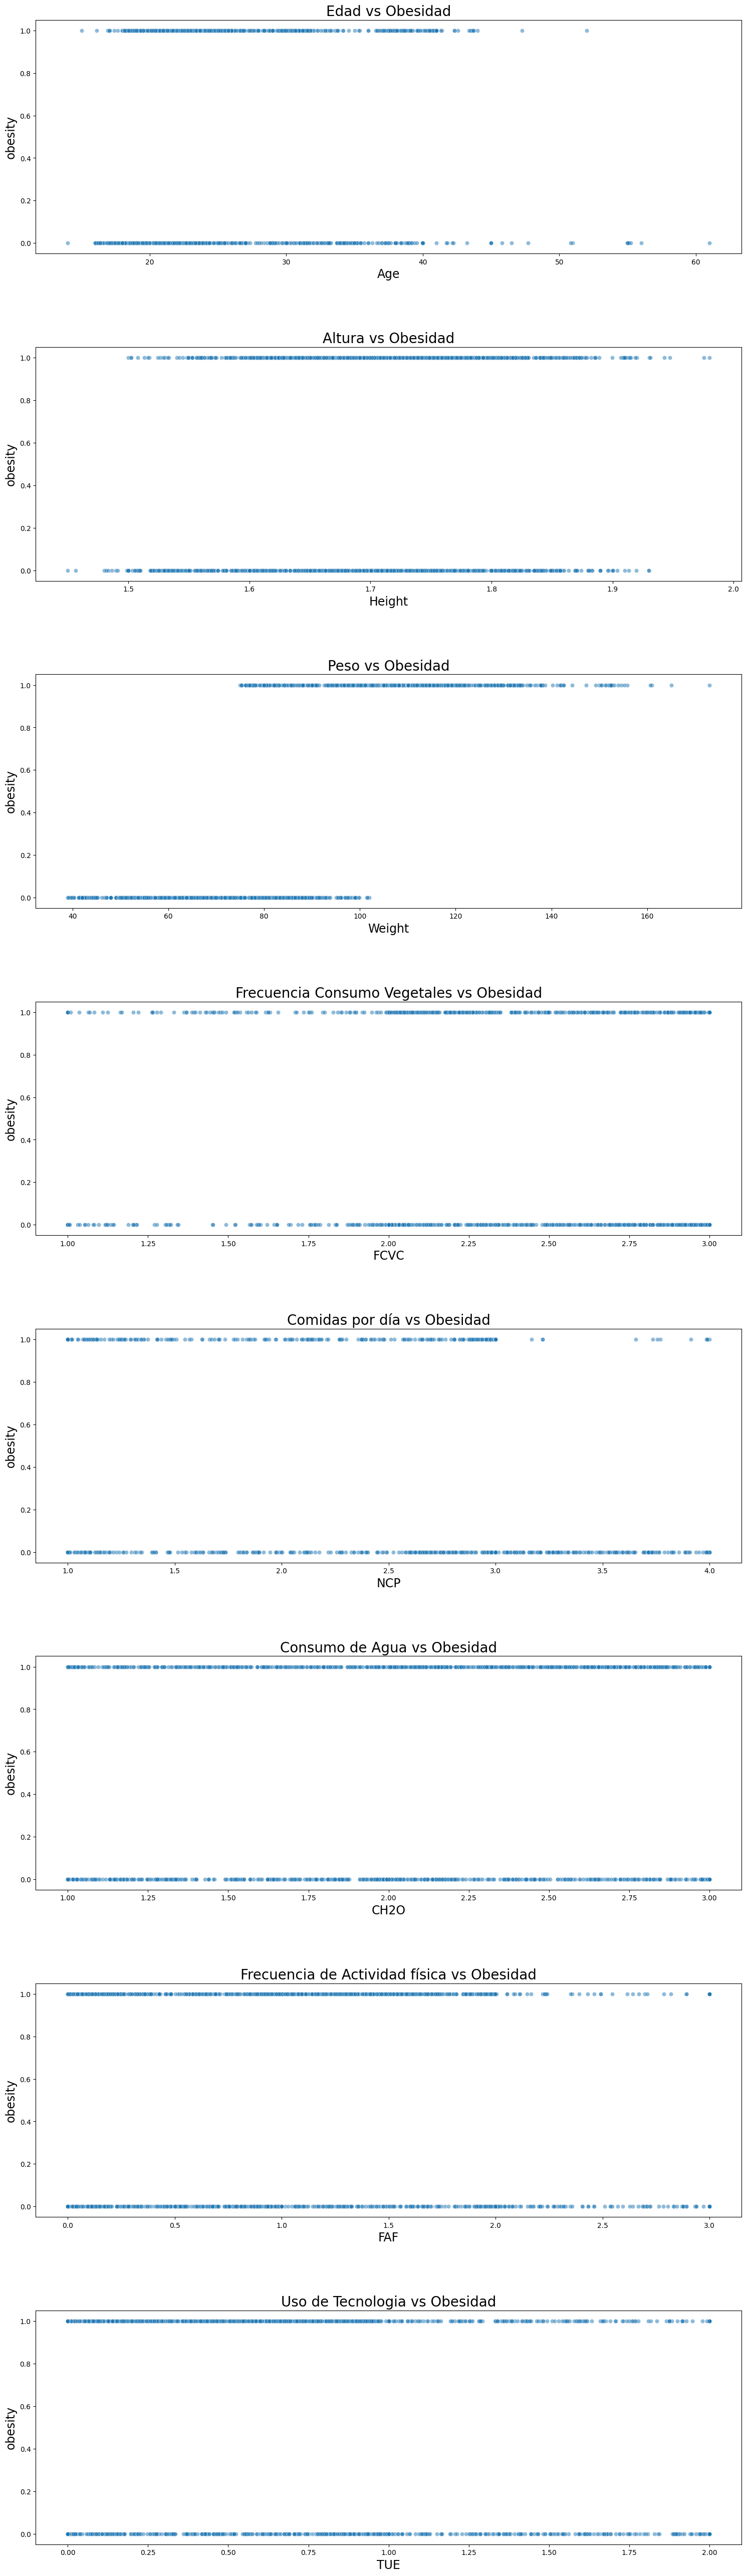

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas numéricas
numeric_cols = [col for col in numeric_cols if col != 'obesity']

# Variable objetivo
target = 'obesity'

# Crear gráficos
plt.figure(figsize=(15, len(numeric_cols) * 7))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i + 1)
    sns.scatterplot(data=df, x=col, y=target, alpha=0.5)
    plt.title(f'{plot_titulos[i]} vs Obesidad',  fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)
    plt.xlabel(col, fontsize=17)
    plt.ylabel(target, fontsize=17)
plt.show()


**Observaciones:**
* La variable weight parece ser la mas determinante para la regresion logistic ya que la sigmoide podria aplicarse facilmente en el scatterplot  que se genero con esta feature , y generalizar bastante bien, para el resto de variables se procedera a hacer un heatmpa  de correlación para ve si podemos entender mejor la relación que tienen con la variable objetivo. 

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

**Descripción del dataset** <br>

* El dataset contiene 2111 instancias  y 16 features. 
* Aunque la variable target tenia mas de una caegoría , se realizo la transformación necesaria para que se pueda predecir entre obeso y no obeso. Es decir, una clasificación binaria.
* Se aplicaran tranformaciones a aquellas columnas categóricas con poder predictivo para transformar aquellas que sean multiclase a features binarias, luego se usara one hot encoding.
* El escalamiento de las features se realizara luego de la division de subconjuntos de entrenamiento y prueba.

## Resolución:

Checkeando Missing values

In [10]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
obesity                           0
dtype: int64

Analizo varianza de variables categóricas para ver si puede eliminar aquellas con varainza baja.

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular la varianza de cada columna numérica
variances = df[numeric_cols].var()

print("Varianza de cada columna numérica:")
print(variances)

Varianza de cada columna numérica:
Age         40.271313
Height       0.008706
Weight     685.977477
FCVC         0.285078
NCP          0.605344
CH2O         0.375712
FAF          0.723507
TUE          0.370792
obesity      0.248553
dtype: float64


**HeatMap de Correlación para analizar colinealidad y relacion con variable objetivo**

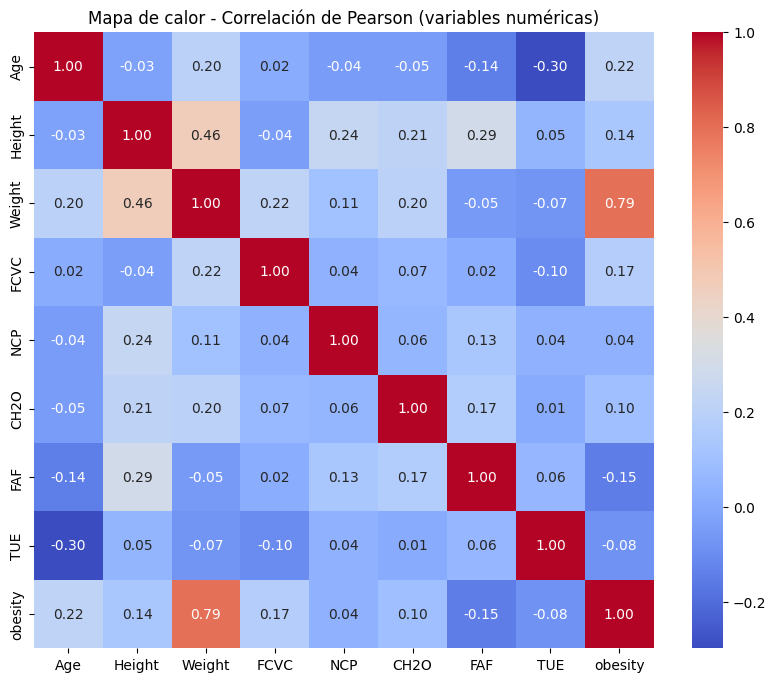

In [12]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlación de Pearson (variables numéricas)")
plt.show()

**Observaciones**

Luego de un analisis del dominio , me doy cuenta que con las variable altura y peso puedo creara la feature IMC, el cual es un gran predictor en el campo de la nutrición.Por eso procedere a crear esta viarbale y analizar nuevamente el heatmap.

Creao nueva variable IMC, con peso y altura.

In [13]:
df['IMC'] = df['Weight'] / (df['Height'] ** 2)
df = df.drop(columns=['Weight', 'Height'])

cols = list(df.columns)
cols.insert(cols.index('Age')+1, cols.pop(cols.index('IMC')))
df = df[cols]
df.head()



,Gender,Age,IMC,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity
0,Female,21.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,0
4,Male,22.0,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,0


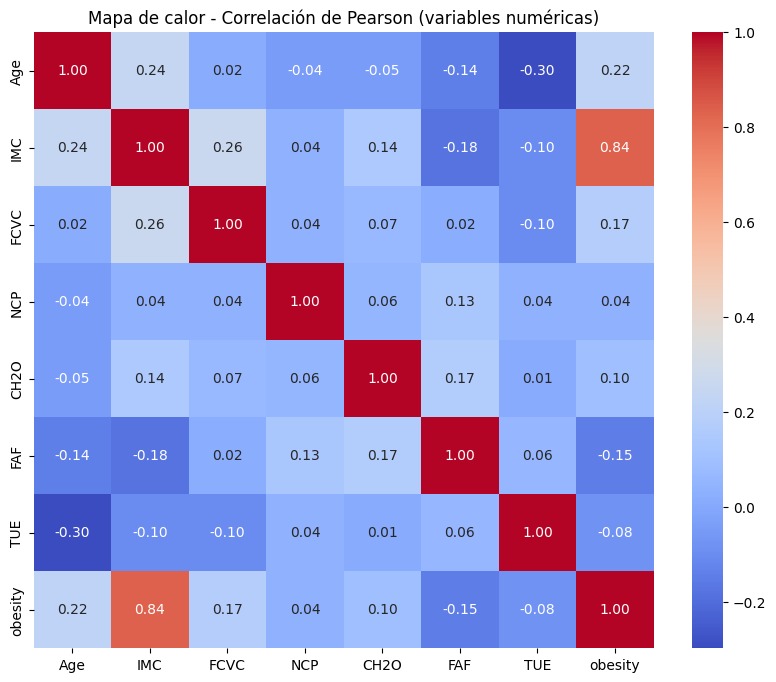

In [14]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_num.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor - Correlación de Pearson (variables numéricas)")
plt.show()

**Selección de Features Numéricas:**
| Variable   | Seleccionada | Análisis                                                                 |
|------------|--------------|--------------------------------------------------------------------------|
| Age(Edad)  | ✅ Sí         | Tiene varianza alta y correlación moderada con obesidad. |
| IMC        | ✅ Sí         | Alta capacidad predictiva, la sigmoide se ajusta bien, es clave en el modelo. |
| FCVC(Consumo vegetales)| ✅ Sí | Poca varianza y moderada correlacion con target |
| NCP(Comidas por dia)| ❌No | Baja correlacion con target |
| CH20(Consumo agua)|  ❌No | Poca varianza y baja correlación con target |
| FAF (Frecuencia Actividad fisica)|  ✅ Sí | Correlación negativa con target y con IMC, pero igual se utilizara |
| TUE (Uso de tecnología)|  ❌No | ALta Correlación negativa con Age se elimina para evitar colinealidad |





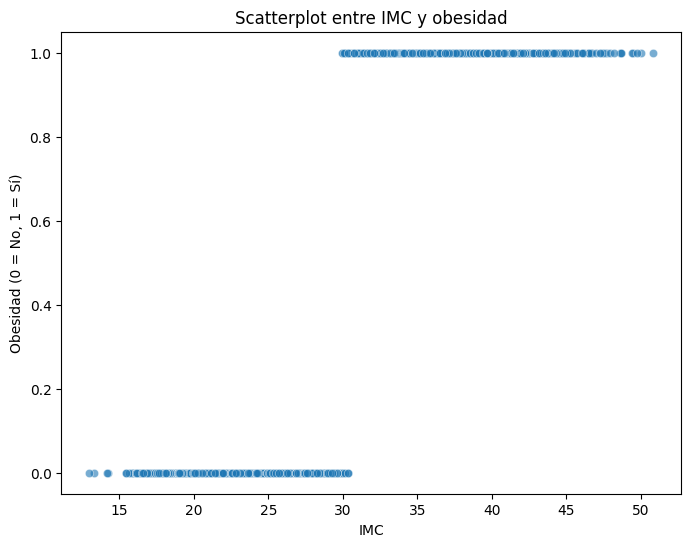

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='IMC', y='obesity', data=df, alpha=0.6)

plt.title("Scatterplot entre IMC y obesidad")
plt.xlabel("IMC")
plt.ylabel("Obesidad (0 = No, 1 = Sí)")
plt.show()

En este caso se observa un alto poder predictivo en  la  feature IMC que creamos para nuestra regresión logistica, ya que se puede ver que la función Sigmoide podría ajustarse casi perfectamente a este scatter plot.

**Relacion variables categóricas con target**

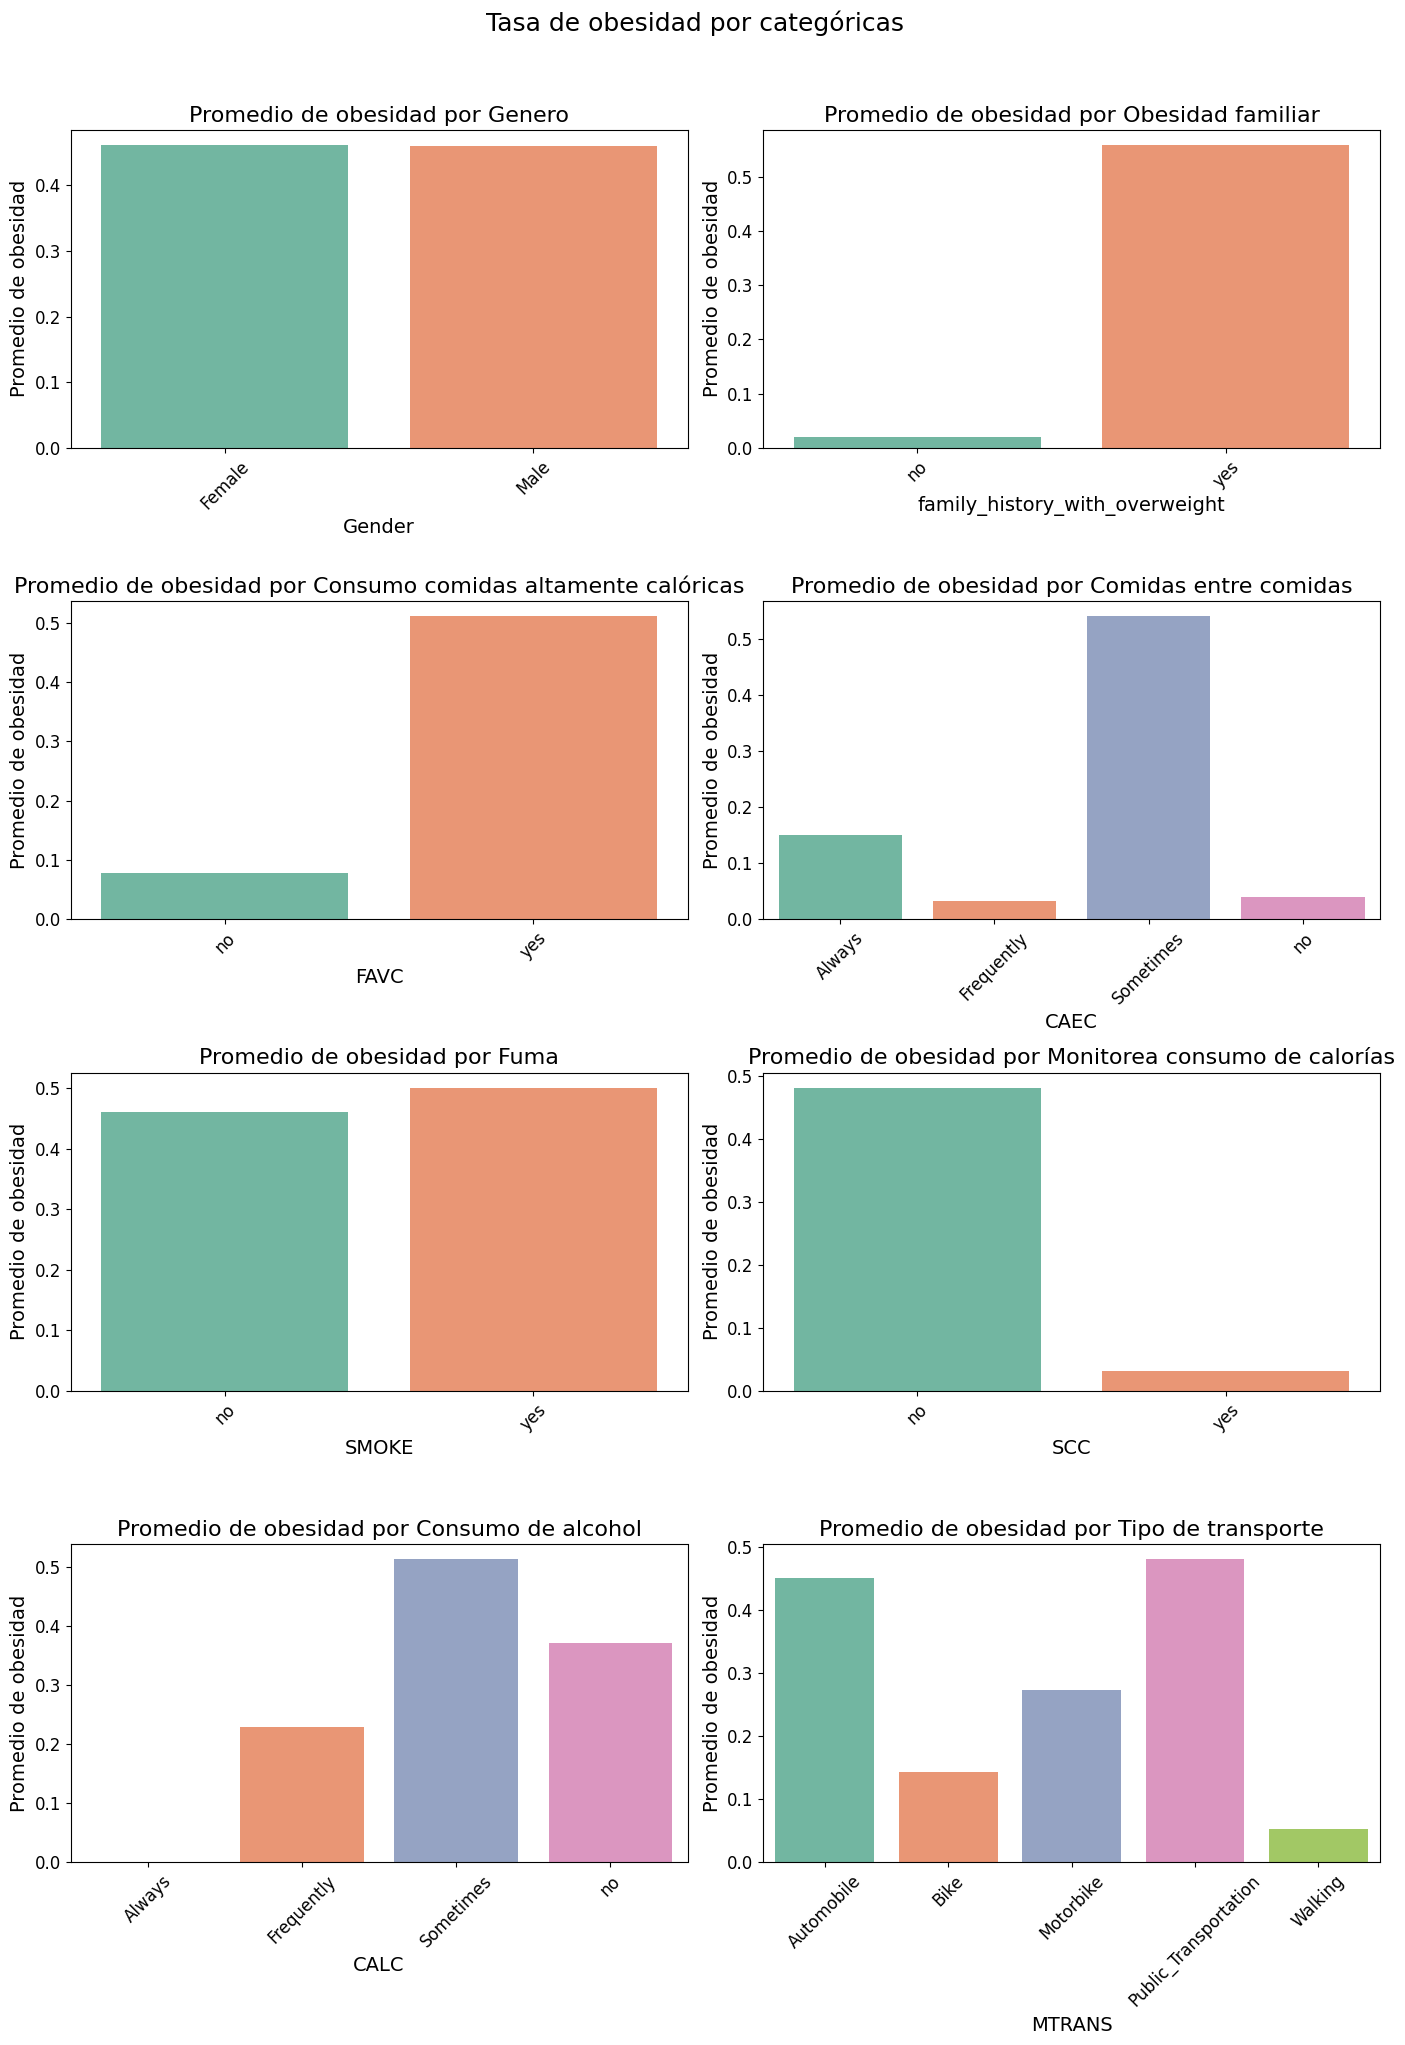

In [16]:
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
axes = axes.flatten()

categorias = [
    'Genero', 
    'Obesidad familiar',
    'Consumo comidas altamente calóricas',
    'Comidas entre comidas',
    'Fuma',
    'Monitorea consumo de calorías',
    'Consumo de alcohol',
    'Tipo de transporte'
]

# Iterar sobre cada columna categórica
for i, col in enumerate(categorical_cols):
    # Calcular promedio de obesidad por categoría
    obesity_means = df.groupby(col)['obesity'].mean().reset_index()

    # Crear gráfico de barras en el subplot correspondiente
    sns.barplot(x=col, y='obesity', data=obesity_means, palette="Set2", ax=axes[i])

    axes[i].set_title(f"Promedio de obesidad por {categorias[i]}", fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel("Promedio de obesidad", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Tasa de obesidad por categóricas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

**Selección de Features Categóricas:**
| Variable      | Seleccionada | Análisis                                                                 |
|---------------|--------------|--------------------------------------------------------------------------|
| Gender(Genero)|   ❌No       | Poco poder predictivo. |
|family_history_overweight (obesidad familiar) | ✅ Sí         | Poder predictivo alto. |
| FAVC (Comidas altamente calóricas)| ✅ Sí |  Poder predictivo alto. |
| CAEC (Comidas entre comidas)| ✅ Sí |  Fuerte relacion con el target. Requerira transformación |
| SMOKE (Fuma)| ❌No  |  Tiene poco poder predictivo la proporción es casi la misma |
| SCC (Monitorea consumo de calorías))| ❌No  |  Poca representatividad de la clase minoritaria. |
| CALC (Consumo de alcohol)| ✅ Sí  |  Fuerte relacion con el target. Requerira transformación |
| MTRANS Obesidad por tipo de transporte)| ❌No  |  Poca representatividad de la clase minoritaria. |







**Transformacion de features categóricas**

Transformo features CAEC (Comidas entre comidas) y CALC(consumo de alcohol) para que tenga dos categorías: (Sometimes / No Sometimes)

In [17]:
df['CAEC'] = df['CAEC'].replace({
    'Sometimes': 'Sometimes',
    'Always': 'No Sometimes',
    'Frequently': 'No Sometimes',
    'no': 'No Sometimes'
})

df['CALC'] = df['CAEC'].replace({
    'Sometimes': 'Sometimes',
    'Always': 'No Sometimes',
    'Frequently': 'No Sometimes',
    'no': 'No Sometimes'
})

df = df.rename(columns={'CAEC': 'CAEC_ST'})
df = df.rename(columns={'CALC': 'CALC_ST'})

print(f"Categorias de  CAEC_ST: { df['CAEC_ST'].unique() }")
print(f"Categorias de  CALC_ST: { df['CALC_ST'].unique() }")



Categorias de  CAEC_ST: ['Sometimes' 'No Sometimes']
Categorias de  CALC_ST: ['Sometimes' 'No Sometimes']


Aplico One Hot encoding a las features categóricas

In [18]:
binarias = [
    'family_history_with_overweight', 
    'FAVC',
    'CAEC_ST',
    'CALC_ST'
    ]

df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['CAEC_ST'] = df['CAEC_ST'].map({'Sometimes': 1, 'No Sometimes': 0})
df['CALC_ST'] = df['CALC_ST'].map({'Sometimes': 1, 'No Sometimes': 0})



In [19]:
#Checkeo si one hot encoding funciono:
print(f"Valores de family_history_with_overweight: { df['family_history_with_overweight'].unique() }")
print(f"FAVC: { df['FAVC'].unique() }")
print(f"CAEC_ST: { df['CAEC_ST'].unique() }")
print(f"CALC_ST: { df['CALC_ST'].unique() }")



Valores de family_history_with_overweight: [1 0]
FAVC: [0 1]
CAEC_ST: [1 0]
CALC_ST: [1 0]


Seleccionando las features:

In [20]:
col_numericas = ['Age', 'IMC', 'FCVC', 'FAF']
col_categoricas = ['family_history_with_overweight', 'FAVC', 'CAEC_ST', 'CALC_ST']
col_objetivo = ['obesity']

cols_total = col_numericas + col_categoricas + col_objetivo


df = df[cols_total]

df.head()

,Age,IMC,FCVC,FAF,family_history_with_overweight,FAVC,CAEC_ST,CALC_ST,obesity
0,21.0,24.386526,2.0,0.0,1,0,1,1,0
1,21.0,24.238227,3.0,3.0,1,0,1,1,0
2,23.0,23.765432,2.0,2.0,1,0,1,1,0
3,27.0,26.851852,3.0,2.0,0,0,1,1,0
4,22.0,28.342381,2.0,0.0,0,0,1,1,0


**Split entrenamiento y prueba**

In [21]:
X = df.drop('obesity', axis=1)
y = df['obesity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño prueba:", X_test.shape, y_test.shape)

Tamaño entrenamiento: (1688, 8) (1688,)
Tamaño prueba: (423, 8) (423,)


**Escalo los conjuntos de test y prueba**

In [22]:
scaler = StandardScaler()

# Ajustar en entrenamiento y transformar
X_train = scaler.fit_transform(X_train)

# Transformar prueba con el mismo scaler
X_test = scaler.transform(X_test)




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [23]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Coeficientes del modelo**

In [24]:
print("b (bias): ", modelo.intercept_)
print("Parámetros (ws): ", modelo.coef_)


b (bias):  [-0.63382062]
Parámetros (ws):  [[-0.08544735  9.60585809 -0.01192524  0.06961048  0.20105164  0.44599049
   0.18362692  0.18362692]]


### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

Accuracy
---

In [25]:
from sklearn.metrics import accuracy_score,  confusion_matrix

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

print("Accuracy")
print("*" * 10)
print("Exactitud Entrenamiento", accuracy_score(y_train, y_pred_train))
print("Exactitud Prueba", accuracy_score(y_test, y_pred_test))



Accuracy
**********
Exactitud Entrenamiento 0.9964454976303317
Exactitud Prueba 0.9952718676122931


**Observaciones**:

El Accuracy de mi modelo es bastante alta, e incluso similar entre el set de entrenamiento y prubea. Teniendo en cuenta que la variable objetivo esta muy bioen balanceada, podemos tomar esta métrica como válida y afirmar que el modelo este generalizando bien y generando buenas predicciones.

Matriz de confusión
---

In [26]:
cm = confusion_matrix(y_test, y_pred_test)
cm_train = confusion_matrix(y_train, y_pred_train)

print("Matriz de confusión (Set validacion):")
print("*" * 37)
print(cm)
print("")
print("Matriz de confusión (Set entrenamiento):")
print("*" * 40)
print(cm_train)

Matriz de confusión (Set validacion):
*************************************
[[227   1]
 [  1 194]]

Matriz de confusión (Set entrenamiento):
****************************************
[[910   1]
 [  5 772]]


**Matriz de confusion en validación**

227 (True Negatives): Casos de la clase negativa correctamente clasificados como negativos.

1 (False Positives): Casos de la clase negativa que fueron incorrectamente clasificados como positivos.

1 (False Negatives): Casos de la clase positiva que fueron incorrectamente clasificados como negativos.

194 (True Positives): Casos de la clase positiva correctamente clasificados como positivos.

**Matriz de confusion en set de prueba**

910 (True Negatives): Casos de la clase negativa correctamente clasificados como negativos.

1 (False Positives): Casos de la clase negativa que fueron incorrectamente clasificados como positivos.

5 (False Negatives): Casos de la clase positiva que fueron incorrectamente clasificados como negativos.

772 (True Positives): Casos de la clase positiva correctamente clasificados como positivos.

In [27]:
precision = 772/(772+1)
sensibilidad = 772/(772+5)
F1_score = 2 * ((precision * sensibilidad) / (precision +sensibilidad))

print("Metricas set de entrenamiento:")
print("*" * 30)
print("Precision (clase positiva))", precision)
print("Recall (Clase positiva)", sensibilidad )
print("F1‑score (clase positiva)", F1_score )
print("")


precision_prueba = 194/(194+1)
sensibilidad_prueba = 194/(194+1)
F1_score_prueba = 2 * ((precision_prueba * sensibilidad_prueba) / (precision_prueba +sensibilidad_prueba))
print("Metricas set de prueba:")
print("*" * 23)
print("Precision (clase positiva))", precision_prueba)
print("Recall (Clase positiva)", sensibilidad_prueba )
print("F1‑score (clase positiva)", F1_score_prueba )

Metricas set de entrenamiento:
******************************
Precision (clase positiva)) 0.9987063389391979
Recall (Clase positiva) 0.9935649935649936
F1‑score (clase positiva) 0.9961290322580646

Metricas set de prueba:
***********************
Precision (clase positiva)) 0.9948717948717949
Recall (Clase positiva) 0.9948717948717949
F1‑score (clase positiva) 0.9948717948717949


**Observaciones**

Solo 2 errores en 423 casos totales.

El balance entre precision y recall es prácticamente perfecto.

Esto indica que el modelo clasifica muy bien tanto positivos como negativos, sin sesgos importantes.

También hay poca varianza entre el set de entrenamiento y prueba, por lo que podemos decir que el modelo generaliza muy bien y no sobreajusta.

## 5- **Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

Eligire SVM ya que su principal aplicación es en clasificación binaria.

### 5.2 Entrenamiento del modelo.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [29]:
svm_model = SVC(
    kernel="linear",  
    C=1.0,             
    gamma="scale",     
    random_state=42
)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)


### 5.3 Evaluación del desempeño

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       228
           1       1.00      0.98      0.99       195

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



El modelo esta funcionando muy bien, de hecho no comete errores al predecir la clase "no obesidad"

Para el caso de la clase "Obesidad  = SI" solo falla en muy pocas ocasiones: recall 0.99

Básicamente conseguimos un modelo que funciona con un alto nivel de exactitud y con un ligero margen de error en el recall de la clase "Obesidad = Si" recall = 0.98

Conseguimos tambien un recall casi perfecto 0.99 lo cual significa que el modelo tiene un equilibrio casi perfecto entre sensibilidad (Número de casos positivos reales captados por el modelo) y precisión (Número de predicciones positivas correctas)

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

* Amplio el margen de la frontera de división con un C = 0.001 haciendo el modelo mas tolerante a errores(Soft Margin)
* Cambio el tipo de kernel de uno lineal a uno "rbf" para separaciones no lineales.
* Cambio el valor de gamma de 50 para ver si el ajuste de la frontera de decision en cada punto del set de entrenamiento genera overfitting.

In [31]:
svm_model_updated = SVC(
    kernel="rbf",  
    C=0.001,             
    gamma=100,     
    random_state=42
)

svm_model_updated.fit(X_train, y_train)

y_pred = svm_model_updated.predict(X_test)

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.54      1.00      0.70       228
           1       0.00      0.00      0.00       195

    accuracy                           0.54       423
   macro avg       0.27      0.50      0.35       423
weighted avg       0.29      0.54      0.38       423



**Observaciones**

Con este cambio de hiperparametros mi modelo funciona considerablemente peor.

Literalmente cada vez que predijo la clase 1 se equivoco. Es decir que con esta clase el modelo falla rotundamente. Basicamente el modelo no aprende caracteristicas que distingan a la clase 1.

El recall de la clase 0 es perfecto pero esto es por que mi modelo con estos hiperparámetros esta siempre prediciendo el valor 0 , lo cual no esta nada bien y esta métrica es engañosa.


## 6- Conclusiones

Fundamente, justifique con sus palabras.

Los modelos de  SVM (sin la modificacion de parámetros) y regresion logistica se desempeñan muy bien, con buenas métricas en ambos escenarios y una mátriz de confusion que deja ver que el modelo predice correctamente casi al 100 por ciento.

La clase objetivo esta balanceada en mi dataset lo que me permite tener en cuenta todas las métricas de evaluacion del modelo.

Si tuviera que quedarme con un modelo para seguir entrenando, aunque ya obtuve buenas métricas, me quedaria con el de Regresion Logistica ya que para este ejemplo es computacionalmente mas eficiente que el de SVM.

La feature de coeficiente mas alto de mi modelo en regresion logistica es la de IMC, que coincide con el scatterplot que mas se ajusta a la Sigmoide y creo que es el determinante de las métrica tan buenas que obtuve. 

# Referencias

Mencione los recursos utilizados

* Documentacion y colabs compartidos en clase
* [Regresión Logística con Python](https://www.youtube.com/watch?v=Z-bFsyiQxb0&t=462s)
* [Hands-On Machine Learning: Logistic Regression with Python and Scikit-Learn](https://www.youtube.com/watch?v=aL21Y-u0SRs)
* [Tutorial: REGRESIÓN LOGÍSTICA con Scikit-Learn](https://www.youtube.com/watch?v=XDG0r7Epn0A)
* [Support Vector Machines (SVM) - the basics | simply explained](https://www.youtube.com/watch?v=gUzEN2TxnxE)

# BONUS 1

Si su dataset estaba relativamente balanceado, como bonus pruebe entrenar otro modelo clasificador diferente y comparar resultados con su clasificador elegido en 5) y el modelo elegido 6) luego del tuneo de hiperparámetros.



# BONUS 2

Si su dataset estaba desbalanceado, puebe utilizar alguna técnica para lidiar con el desbalance de clases durante el entrenamiento.

1) Ofrezca una comparativa de entrenar y evaluar modelos de Logistic regression con y sin class_weight='balanced' o el modelo SVC con y sin class_weight='balanced'

2) Pruebe entrenar KNN con y sin uso de SMOTE

( Ver apunte sobre Desbalance de clases de la cátedra )

